In [1]:
# Background: A Kaggle provided, from the CDC and is a major part of the Behavioral Risk Factor Surveillance System 
# (BRFSS), which conducts annual telephone surveys to collect data on the health status of U.S. residents. 
#  https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [2]:
# The goal of the notebook is to construct a logistic regression model to predict heart attacks
#   (the dependent variable - 'HadHeartAttack') based on the other variables as independet predictor variables. 

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [4]:
# setup for multiple outputs from single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
# silence warnings
import warnings
warnings.filterwarnings('ignore')
import absl.logging as absl_logging

In [6]:
###########################################################################################
# SET AND VERIFY THE CURRENT WORKING DIRECTORY (CHANGE AS NEEDED)##########################
###########################################################################################
import os
root_directory = '/media/ijmg/SSD_FOUR_TB/IJMG_DATA_SCIENTIST/data sets/CDC_CHD/'
os.chdir(root_directory) 
print(os.getcwd() + '/')
print(root_directory)

/media/ijmg/SSD_FOUR_TB/IJMG_DATA_SCIENTIST/data sets/CDC_CHD/
/media/ijmg/SSD_FOUR_TB/IJMG_DATA_SCIENTIST/data sets/CDC_CHD/


In [7]:
################################################
##    I. EXPLORATORY DATA ANALYSIS (EDA):
################################################
# Data Visualization: As allowed by data, show:
#  -- summary statistics
#  -- histograms 
#  -- box plots
#  -- outliers
#  -- scatter plots 
#  -- correlation matrices

In [8]:
# Load the dataset from CSV file into a DataFrame and preview
source_df = pd.read_csv('heart_2022_with_nans.csv')
# Display the DataFrame and print dimensions 
print("Number of rows:", source_df.shape[0])
print("Number of columns:", source_df.shape[1])
source_df.head()
source_df.tail()

Number of rows: 445132
Number of columns: 40


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
445131,Virgin Islands,Male,Very good,0.0,1.0,NaN,Yes,5.0,None of them,No,...,1.68,63.50,22.60,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No


In [9]:
# Before any data visualizations, count then remove any missing values or NaNs

In [10]:
# Count missing (NaN) values for each column/variable
missing_values_df = source_df.isna().sum()  # or df.isnull().sum()
print("Missing Values in Each Variable:\n")
print(missing_values_df)
print("\nMissing Values in Entire Dataframe:\n")
print(missing_values_df.sum())

Missing Values in Each Variable:

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan            

In [11]:
# Remove missing (NaN) values for each column/variable
source_df = source_df.dropna()

In [12]:
# Verify removal of missing (NaN) values with counts for each column/variable
missing_values_df = source_df.isna().sum()  # or df.isnull().sum()
print("Missing Values in Each Variable:\n")
print(missing_values_df)
print("\nMissing Values in Entire Dataframe:\n")
print(missing_values_df.sum())

Missing Values in Each Variable:

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
Weigh

In [13]:
# Display the DataFrame and print dimensions 
print("Number of rows:", source_df.shape[0])
print("Number of columns:", source_df.shape[1])
source_df.head()
source_df.tail()

Number of rows: 246022
Number of columns: 40


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
445117,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
445123,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445124,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [14]:
# COMMENT: At this point, the removal of rows holding 902665 missing values
#   resulted in a decrease in the datarame size 
#   from 
#   Number of rows: 445132
#   Number of columns: 40
#   to
#   Number of rows: 246022
#   Number of columns: 40

In [15]:
# Begin Exploratory Data Analysis and Visualizations

In [16]:
# Visualize unique categories for each column/variable
for column in source_df.columns:
    unique_categories = source_df[column].unique()
    print(f"Unique categories for column '{column}':")
    print(unique_categories)
    print()

Unique categories for column 'State':
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Unique categories for column 'Sex':
['Female' 'Male']

Unique categories for column 'GeneralHealth':
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']

Unique categories for column 'PhysicalHealthDays':
[ 4.  0.  5.  3.  2. 25. 30. 15. 29.  8. 16. 20. 10.  9.  7.  1. 21.  6.
 27. 14. 12. 11. 13. 28. 17. 23. 24. 26. 18.

In [17]:
# Visualize data types of each column/variable
column_types = source_df.dtypes

# Find columns with data type 'object' (strings), 'int' (integers), 'float' (float numbers)
string_columns = column_types[column_types == 'object'].index.tolist()
integer_columns = column_types[column_types == 'int'].index.tolist()
float_columns = column_types[column_types == 'float'].index.tolist()

# Display remaining categorical string variables for one-hot encoding
print("Columns holding data as strings:")
print(string_columns)
# Display numeric integer value (binary) variables
print("\nColumns holding data as numeric integers:")
print(integer_columns)
# Display numeric floating value variables
print("\nColumns holding data as numeric floats:")
print(float_columns)

Columns holding data as strings:
['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']

Columns holding data as numeric integers:
[]

Columns holding data as numeric floats:
['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']


In [18]:
# Visualize summary statistics of numeric float variables
summary_statistics_df = source_df[float_columns].describe()
print(summary_statistics_df)

       PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       246022.000000     246022.000000  246022.000000   246022.000000   
mean             4.119026          4.167140       7.021331        1.705150   
std              8.405844          8.102687       1.440681        0.106654   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          4.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  
count      246022.000000  246022.000000  
mean           83.615179      28.668136  
std            21.323156       6.513973  
min            28.120000      12.020000  
25%            68.040000      24.270000  
50%            81.650000      27.460000  
75%

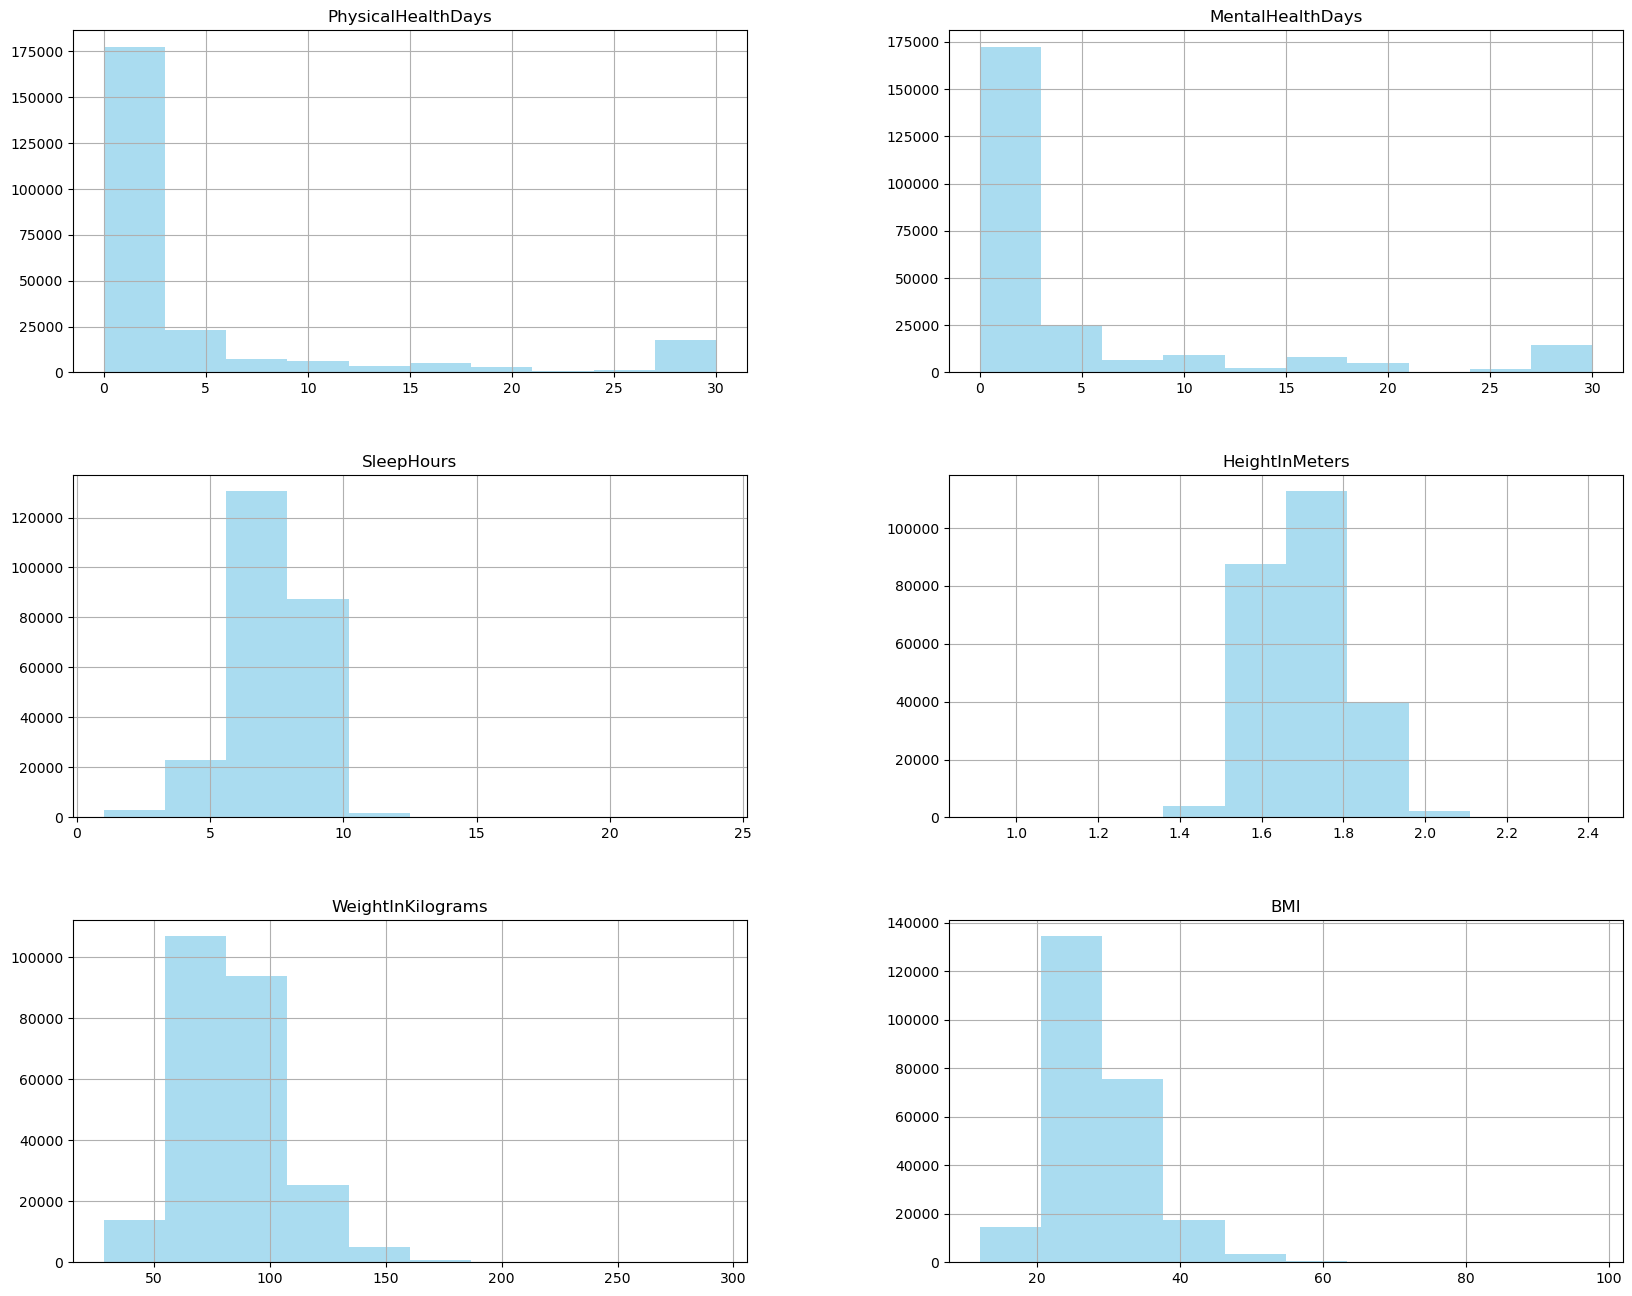

In [19]:
# Visualize histograms of numeric float variables
source_df[float_columns].hist(figsize=(20, 16) , color='skyblue', alpha=0.7)
plt.show();

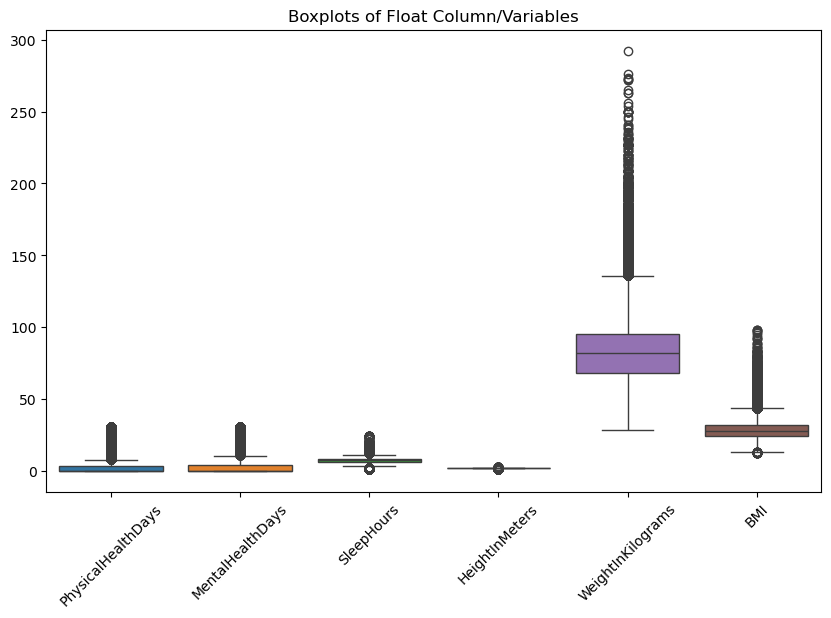

In [20]:
# Visualize boxplots of numeric float variables
plt.figure(figsize=(10, 6));
sns.boxplot(data=source_df[float_columns]);
plt.title('Boxplots of Float Column/Variables');
plt.xticks(rotation=45);  # Rotate x-axis labels for better readability
plt.show;

In [21]:
# COMMENT: 
#   Summary statistics, histograms, and boxplots all indicate the presence of 
#   outliers for the numeric float variables:
#   'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI'.
#   No effort will be made to remove these outliers since they may be relevant in 
#   predicting the dependent variable, 'HadHeartAttack'.

<Figure size 1200x800 with 0 Axes>

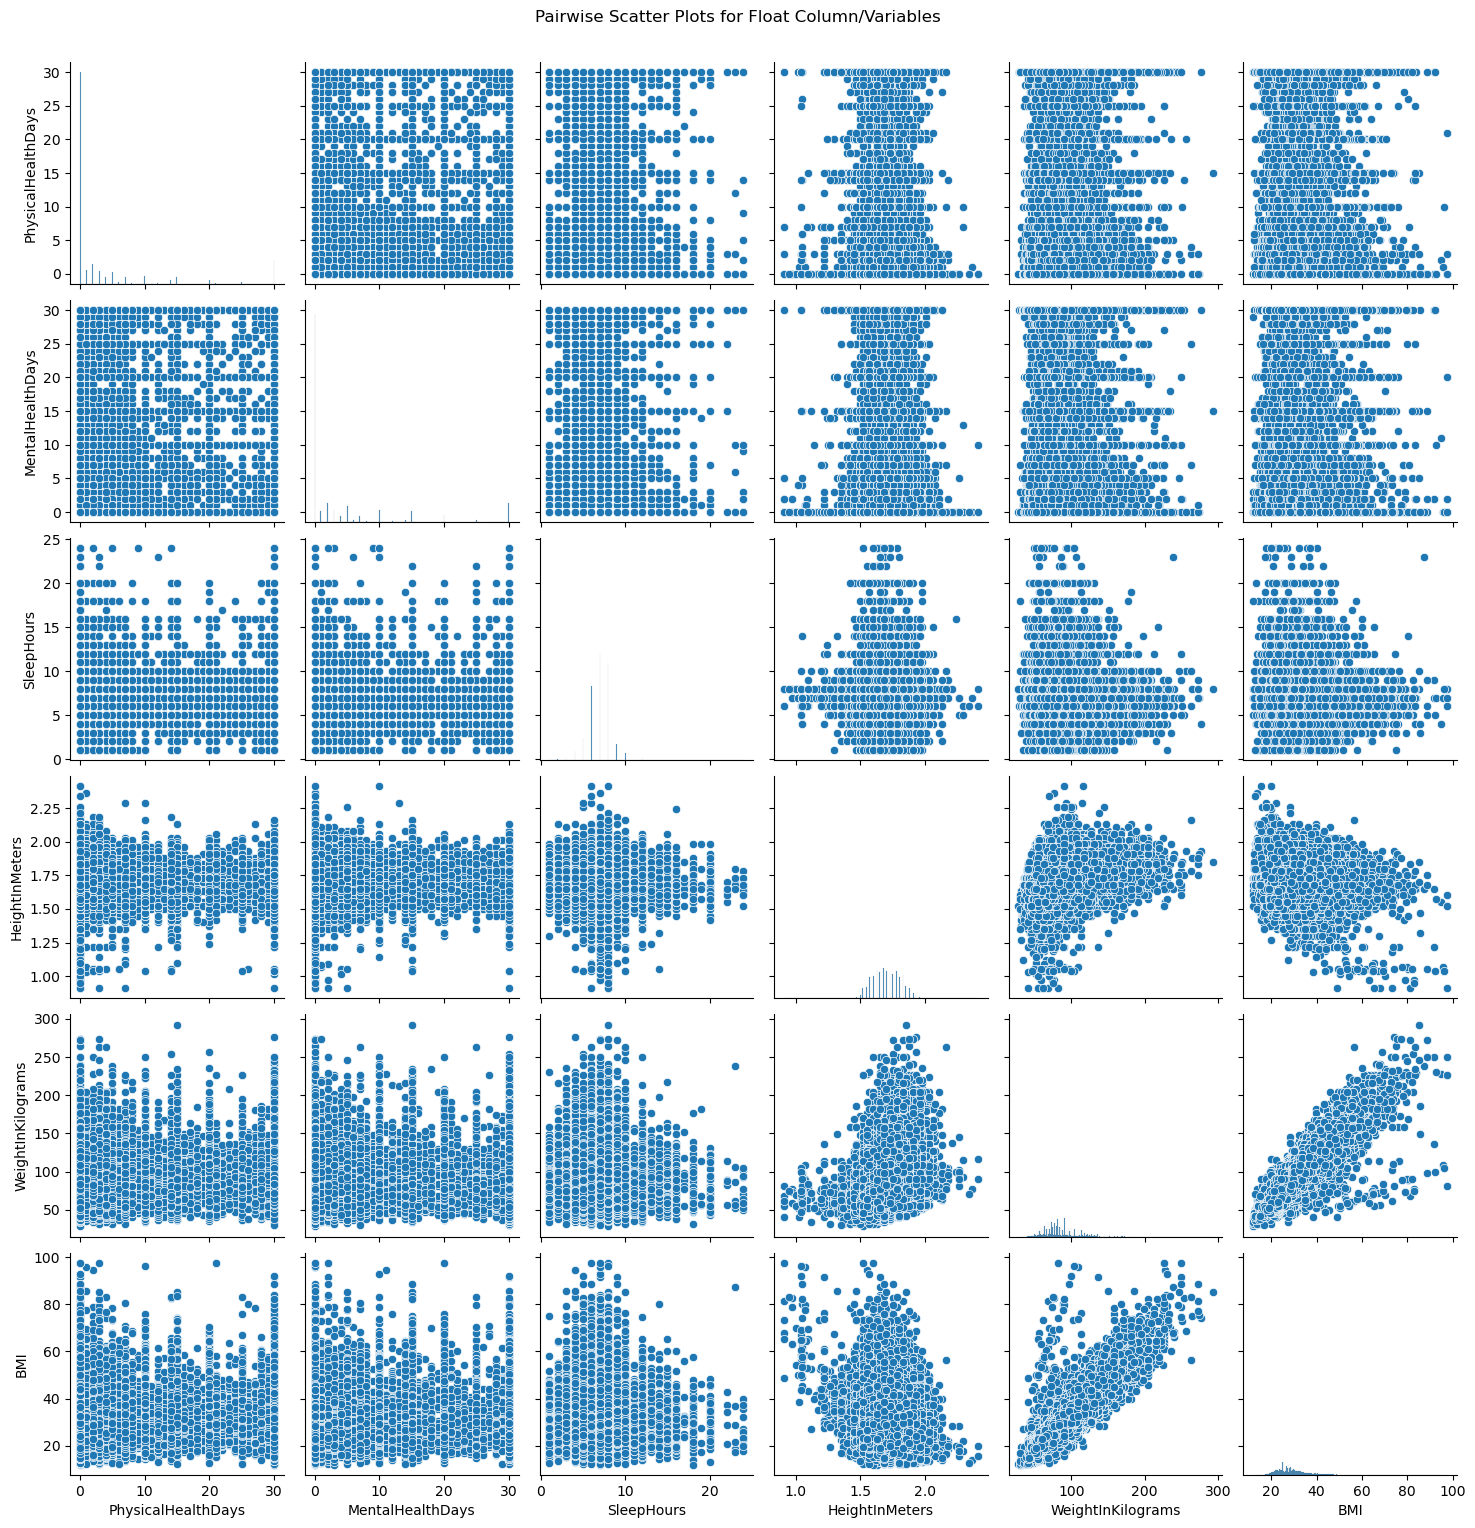

In [22]:
# Visualize scatter plots of numeric float variables
plt.figure(figsize=(12, 8));
sns.pairplot(source_df[float_columns]);
plt.suptitle('Pairwise Scatter Plots for Float Column/Variables', y=1.02);
plt.show();

In [23]:
# COMMENT: 
#   Scatter plots suggest positive correlations between: 
#   'HeightInMeters' and 'BMI'
#   'WeightInKilograms' and 'BMI'
#   'WeightInKilograms' and 'HeightInMeters'
#   No other positive or negative correlations seem present

In [24]:
# Visualize correlation matrix

# COMMENT: 
#   Given the large number of variables and anticipated difficulty in viewing them 
#   all in the same correlation matrix, the attempt to visualize a correlation
#   matrix will be made after the most relevant variables have been selected using
#   feature engineering.

In [25]:
################################################
##    II.    FEATURE ENGINEERING:
################################################
# Begin the process of 
#  -- making all variables numeric, 
#  -- normalize/scale all numeric float variables, 
#  -- selecting the best variables based on correlation matrix values
#  -- adding any variable-to-variable interation terms

In [26]:
 # Make all column/variables binary with replacements of "1" or "0"
replacements = {
    'PhysicalActivities': {'Yes': 1, 'No': 0},
    'HadHeartAttack': {'Yes': 1, 'No': 0},
    'HadAngina': {'Yes': 1, 'No': 0},
    'HadStroke': {'Yes': 1, 'No': 0},
    'HadAsthma': {'Yes': 1, 'No': 0},
    'HadSkinCancer': {'Yes': 1, 'No': 0},
    'HadCOPD': {'Yes': 1, 'No': 0},
    'HadDepressiveDisorder': {'Yes': 1, 'No': 0},
    'HadKidneyDisease': {'Yes': 1, 'No': 0},
    'HadArthritis': {'Yes': 1, 'No': 0},
    'DeafOrHardOfHearing': {'Yes': 1, 'No': 0},
    'BlindOrVisionDifficulty': {'Yes': 1, 'No': 0},
    'DifficultyConcentrating': {'Yes': 1, 'No': 0},
    'DifficultyWalking': {'Yes': 1, 'No': 0},
    'DifficultyDressingBathing': {'Yes': 1, 'No': 0},
    'DifficultyErrands': {'Yes': 1, 'No': 0},
    'ChestScan': {'Yes': 1, 'No': 0},
    'gender': {'Yes': 1, 'No': 0},
    'AlcoholDrinkers': {'Yes': 1, 'No': 0},
    'HIVTesting': {'Yes': 1, 'No': 0},
    'FluVaxLast12': {'Yes': 1, 'No': 0},
    'PneumoVaxEver': {'Yes': 1, 'No': 0},
    'HighRiskLastYear': {'Yes': 1, 'No': 0}
}

# Apply replacements to multiple columns at once
source_df.replace(replacements, inplace=True)

In [27]:
# Verify changes. Print unique categories for each column/variable
for column in source_df.columns:
    unique_categories = source_df[column].unique()
    print(f"Unique categories for column '{column}':")
    print(unique_categories)
    print()

Unique categories for column 'State':
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Unique categories for column 'Sex':
['Female' 'Male']

Unique categories for column 'GeneralHealth':
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']

Unique categories for column 'PhysicalHealthDays':
[ 4.  0.  5.  3.  2. 25. 30. 15. 29.  8. 16. 20. 10.  9.  7.  1. 21.  6.
 27. 14. 12. 11. 13. 28. 17. 23. 24. 26. 18.

In [28]:
# In anticipation of one-hot encoding for remaining categorical string variables,
#   check data types of each column.
column_types = source_df.dtypes

# Find columns with data type 'object' (strings), 'int' (integers), 'float' (float numbers)
string_columns = column_types[column_types == 'object'].index.tolist()
integer_columns = column_types[column_types == 'int'].index.tolist()
float_columns = column_types[column_types == 'float'].index.tolist()

# Display remaining categorical string variables for one-hot encoding
print("Columns holding values as strings:")
print(string_columns)
# Display numeric integer value (binary) variables
print("\nColumns holding values as integers:")
print(integer_columns)
# Display numeric floating value variables
print("\nColumns holding values as floats:")
print(float_columns)

Columns holding values as strings:
['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'TetanusLast10Tdap', 'CovidPos']

Columns holding values as integers:
['PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear']

Columns holding values as floats:
['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']


In [29]:
# Apply one-hot encoding to categorical column/variables holding values 
#   as strings
encoded_df = pd.get_dummies(source_df, columns=string_columns)

In [30]:
# Verify changes. Check data types of each column
column_types = encoded_df.dtypes

# Find columns with data type 'object' (strings)
string_columns = column_types[column_types == 'object'].index.tolist()
integer_columns = column_types[column_types == 'int'].index.tolist()
float_columns = column_types[column_types == 'float'].index.tolist()
boolean_columns = column_types[column_types == 'bool'].index.tolist()

print("Columns holding values as strings:")
print(string_columns)
print("\nColumns holding values as integers:")
print(integer_columns)
print("\nColumns holding values as floats:")
print(float_columns)
print("\nColumns holding values as booleans (True/False):")
print(boolean_columns)

Columns holding values as strings:
[]

Columns holding values as integers:
['PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear']

Columns holding values as floats:
['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

Columns holding values as booleans (True/False):
['State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware', 'State_District of Columbia', 'State_Florida', 'State_Georgia', 'State_Guam', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', '

In [31]:
# Verify that all variables are now some form of numeric:
#  -- integer, binary 0 or 1
#  -- float
#  -- boolean, True "1"/False "0" (after one-hot encoding)
# Print unique catagories for each column/variable
for column in encoded_df.columns:
    unique_categories = encoded_df[column].unique()
    print(f"Unique categories for column '{column}':")
    print(unique_categories)
    print()

Unique categories for column 'PhysicalHealthDays':
[ 4.  0.  5.  3.  2. 25. 30. 15. 29.  8. 16. 20. 10.  9.  7.  1. 21.  6.
 27. 14. 12. 11. 13. 28. 17. 23. 24. 26. 18. 22. 19.]

Unique categories for column 'MentalHealthDays':
[ 0. 15.  4. 25.  5. 30. 27.  3.  2.  1. 10. 20. 21.  6.  7.  8. 14.  9.
 12. 18. 29. 28. 17. 11. 16. 13. 26. 22. 24. 19. 23.]

Unique categories for column 'PhysicalActivities':
[1 0]

Unique categories for column 'SleepHours':
[ 9.  6.  8.  5.  7. 10.  4. 12.  3. 18. 11.  2.  1. 16. 14. 15. 13. 20.
 24. 23. 19. 17. 22.]

Unique categories for column 'HadHeartAttack':
[0 1]

Unique categories for column 'HadAngina':
[0 1]

Unique categories for column 'HadStroke':
[0 1]

Unique categories for column 'HadAsthma':
[0 1]

Unique categories for column 'HadSkinCancer':
[0 1]

Unique categories for column 'HadCOPD':
[0 1]

Unique categories for column 'HadDepressiveDisorder':
[0 1]

Unique categories for column 'HadKidneyDisease':
[0 1]

Unique categories for column 

In [32]:
# Normalize/scale all numeric float variables 
# Initialize scaler objects
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Fit and transform selected columns using standard scaler
encoded_df[float_columns] = standard_scaler.fit_transform(encoded_df[float_columns])

# Fit and transform selected columns using min-max scaler
encoded_df[float_columns] = min_max_scaler.fit_transform(encoded_df[float_columns])


In [33]:
# Verify that all variables are now some form of numeric:
#  -- integer, binary 0 or 1
#  -- float (normalized/scaled between 0 and 1)
#  -- boolean, True "1"/False "0" (after one-hot encoding)
# Print unique catagories for each column/variable
for column in encoded_df.columns:
    unique_categories = encoded_df[column].unique()
    print(f"Unique categories for column '{column}':")
    print(unique_categories)
    print()

Unique categories for column 'PhysicalHealthDays':
[0.13333333 0.         0.16666667 0.1        0.06666667 0.83333333
 1.         0.5        0.96666667 0.26666667 0.53333333 0.66666667
 0.33333333 0.3        0.23333333 0.03333333 0.7        0.2
 0.9        0.46666667 0.4        0.36666667 0.43333333 0.93333333
 0.56666667 0.76666667 0.8        0.86666667 0.6        0.73333333
 0.63333333]

Unique categories for column 'MentalHealthDays':
[0.         0.5        0.13333333 0.83333333 0.16666667 1.
 0.9        0.1        0.06666667 0.03333333 0.33333333 0.66666667
 0.7        0.2        0.23333333 0.26666667 0.46666667 0.3
 0.4        0.6        0.96666667 0.93333333 0.56666667 0.36666667
 0.53333333 0.43333333 0.86666667 0.73333333 0.8        0.63333333
 0.76666667]

Unique categories for column 'PhysicalActivities':
[1 0]

Unique categories for column 'SleepHours':
[0.34782609 0.2173913  0.30434783 0.17391304 0.26086957 0.39130435
 0.13043478 0.47826087 0.08695652 0.73913043 0.43478261 

In [34]:
# Display the DataFrame and print dimensions 
# Note increase in total column/variable count due to one-hot encoding
# Note that all column/variables are normalized, binary, or boolean
print("Number of rows:", encoded_df.shape[0])
print("Number of columns:", encoded_df.shape[1])
encoded_df.head()
encoded_df.tail()

Number of rows: 246022
Number of columns: 134


,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
342,0.133333,0.0,1,0.347826,0,0,0,0,0,0,...,False,False,False,False,True,False,False,True,False,False
343,0.000000,0.0,1,0.217391,0,0,0,0,0,0,...,True,False,False,False,False,True,False,True,False,False
345,0.000000,0.0,0,0.304348,0,0,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
346,0.166667,0.0,1,0.347826,0,0,0,0,1,0,...,False,False,True,True,False,False,False,False,False,True
347,0.100000,0.5,1,0.173913,0,0,0,0,0,0,...,False,False,True,True,False,False,False,True,False,False


,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
445117,0.000000,0.000000,1,0.217391,0,0,0,0,0,0,...,False,False,False,False,False,True,False,True,False,False
445123,0.000000,0.233333,1,0.260870,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,True
445124,0.000000,0.500000,1,0.260870,0,0,1,0,0,0,...,False,False,False,False,False,True,False,False,False,True
445128,0.066667,0.066667,1,0.260870,0,0,0,0,0,0,...,False,False,False,False,False,True,False,True,False,False
445130,0.000000,0.000000,0,0.173913,1,0,0,1,0,0,...,True,False,False,True,False,False,False,False,False,True


In [35]:
# Begin analysis of correlation values to select best predictor variables

In [36]:
# Determine correlation matrix
# Set pandas display options to show all columns
pd.set_option('display.max_rows', None)

# Calculate correlation between the selected variable and all other variables
correlation_with_HadHeartAttack_variable = encoded_df.corr()['HadHeartAttack'].sort_values(ascending=False)

# Print all correlation values
print("Correlation with selected variable:")
print(correlation_with_HadHeartAttack_variable)

Correlation with selected variable:
HadHeartAttack                                                                 1.000000
HadAngina                                                                      0.445903
HadStroke                                                                      0.177137
ChestScan                                                                      0.167760
DifficultyWalking                                                              0.159878
HadDiabetes_Yes                                                                0.145868
GeneralHealth_Poor                                                             0.140607
PhysicalHealthDays                                                             0.133420
HadCOPD                                                                        0.133223
RemovedTeeth_All                                                               0.120564
PneumoVaxEver                                                                  0.119

In [37]:
# Find high correlation values based on the threshold of > +0.07 or < -0.07
correlations_above_threshold = correlation_with_HadHeartAttack_variable > +0.07
correlations_below_threshold = correlation_with_HadHeartAttack_variable < -0.07
high_correlation_variables = correlation_with_HadHeartAttack_variable[(correlations_above_threshold) | (correlations_below_threshold)]

# Sort the high correlation values
high_correlation_variables = high_correlation_variables.sort_values(ascending=False)

# Print high correlation values
print("Variables with correlation greater than +0.7 or less than -0.7:")
print(high_correlation_variables)

Variables with correlation greater than +0.7 or less than -0.7:
HadHeartAttack                                                        1.000000
HadAngina                                                             0.445903
HadStroke                                                             0.177137
ChestScan                                                             0.167760
DifficultyWalking                                                     0.159878
HadDiabetes_Yes                                                       0.145868
GeneralHealth_Poor                                                    0.140607
PhysicalHealthDays                                                    0.133420
HadCOPD                                                               0.133223
RemovedTeeth_All                                                      0.120564
PneumoVaxEver                                                         0.119955
HadArthritis                                                       

In [38]:
# Create empty list
high_correlation_variable_list = []
# Convert first column from 'high_correlation_variables' series into a list
for i in range(0, len(high_correlation_variables)):
    high_correlation_variable_list.append(high_correlation_variables.index[i])

print(high_correlation_variable_list)

['HadHeartAttack', 'HadAngina', 'HadStroke', 'ChestScan', 'DifficultyWalking', 'HadDiabetes_Yes', 'GeneralHealth_Poor', 'PhysicalHealthDays', 'HadCOPD', 'RemovedTeeth_All', 'PneumoVaxEver', 'HadArthritis', 'GeneralHealth_Fair', 'HadKidneyDisease', 'AgeCategory_Age 80 or older', 'DeafOrHardOfHearing', 'RemovedTeeth_6 or more, but not all', 'DifficultyErrands', 'DifficultyDressingBathing', 'SmokerStatus_Former smoker', 'AgeCategory_Age 75 to 79', 'Sex_Male', 'BlindOrVisionDifficulty', 'LastCheckupTime_Within past year (anytime less than 12 months ago)', 'Sex_Female', 'AlcoholDrinkers', 'GeneralHealth_Excellent', 'PhysicalActivities', 'GeneralHealth_Very good', 'SmokerStatus_Never smoked', 'RemovedTeeth_None of them', 'HadDiabetes_No']


In [39]:
# Create smaller data frame consisting only of high correlation variables from 
#   original larger data frame
high_corr_encoded_df = encoded_df[high_correlation_variable_list]

# Display original larger data frame with its dimensions
print("LARGER DATA FRAME CONSISTING OF ALL VARIABLES\n")
print("Number of rows:", encoded_df.shape[0])
print("Number of columns:", encoded_df.shape[1])
encoded_df.head()
encoded_df.tail()

# Display new data smaller frame with its dimensions
print("\n\nSMALLER DATA FRAME CONSISTING OF ONLY HIGH CORRELATION VARIABLES\n")
print("Number of rows:", high_corr_encoded_df.shape[0])
print("Number of columns:", high_corr_encoded_df.shape[1])
high_corr_encoded_df.head()
high_corr_encoded_df.tail()

LARGER DATA FRAME CONSISTING OF ALL VARIABLES

Number of rows: 246022
Number of columns: 134


,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
342,0.133333,0.0,1,0.347826,0,0,0,0,0,0,...,False,False,False,False,True,False,False,True,False,False
343,0.000000,0.0,1,0.217391,0,0,0,0,0,0,...,True,False,False,False,False,True,False,True,False,False
345,0.000000,0.0,0,0.304348,0,0,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
346,0.166667,0.0,1,0.347826,0,0,0,0,1,0,...,False,False,True,True,False,False,False,False,False,True
347,0.100000,0.5,1,0.173913,0,0,0,0,0,0,...,False,False,True,True,False,False,False,True,False,False


,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
445117,0.000000,0.000000,1,0.217391,0,0,0,0,0,0,...,False,False,False,False,False,True,False,True,False,False
445123,0.000000,0.233333,1,0.260870,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,True
445124,0.000000,0.500000,1,0.260870,0,0,1,0,0,0,...,False,False,False,False,False,True,False,False,False,True
445128,0.066667,0.066667,1,0.260870,0,0,0,0,0,0,...,False,False,False,False,False,True,False,True,False,False
445130,0.000000,0.000000,0,0.173913,1,0,0,1,0,0,...,True,False,False,True,False,False,False,False,False,True




SMALLER DATA FRAME CONSISTING OF ONLY HIGH CORRELATION VARIABLES

Number of rows: 246022
Number of columns: 32


,HadHeartAttack,HadAngina,HadStroke,ChestScan,DifficultyWalking,HadDiabetes_Yes,GeneralHealth_Poor,PhysicalHealthDays,HadCOPD,RemovedTeeth_All,...,BlindOrVisionDifficulty,LastCheckupTime_Within past year (anytime less than 12 months ago),Sex_Female,AlcoholDrinkers,GeneralHealth_Excellent,PhysicalActivities,GeneralHealth_Very good,SmokerStatus_Never smoked,RemovedTeeth_None of them,HadDiabetes_No
342,0,0,0,0,0,False,False,0.133333,0,False,...,0,True,True,0,False,1,True,False,True,True
343,0,0,0,0,0,True,False,0.000000,0,False,...,0,True,False,0,False,1,True,False,True,False
345,0,0,0,1,1,False,False,0.000000,0,False,...,1,True,False,1,False,0,True,False,False,True
346,0,0,0,0,1,False,False,0.166667,0,False,...,0,True,True,0,False,1,False,True,True,True
347,0,0,0,0,0,False,False,0.100000,0,False,...,0,True,True,0,False,1,False,True,False,True


,HadHeartAttack,HadAngina,HadStroke,ChestScan,DifficultyWalking,HadDiabetes_Yes,GeneralHealth_Poor,PhysicalHealthDays,HadCOPD,RemovedTeeth_All,...,BlindOrVisionDifficulty,LastCheckupTime_Within past year (anytime less than 12 months ago),Sex_Female,AlcoholDrinkers,GeneralHealth_Excellent,PhysicalActivities,GeneralHealth_Very good,SmokerStatus_Never smoked,RemovedTeeth_None of them,HadDiabetes_No
445117,0,0,0,0,0,False,False,0.000000,0,False,...,0,False,False,1,False,1,True,True,True,True
445123,0,0,0,0,0,False,False,0.000000,0,False,...,0,True,True,0,False,1,False,True,True,True
445124,0,0,1,0,0,True,False,0.000000,0,False,...,0,True,False,1,False,1,False,True,False,False
445128,0,0,0,0,0,False,False,0.066667,0,False,...,0,True,True,0,True,1,False,True,True,True
445130,1,0,0,1,0,False,False,0.000000,0,False,...,0,True,False,0,False,0,True,True,True,True


In [40]:
# COMMENT: 
#   Focusing only on high correlaton variables, drops the total
#   variable count from 134 to 32

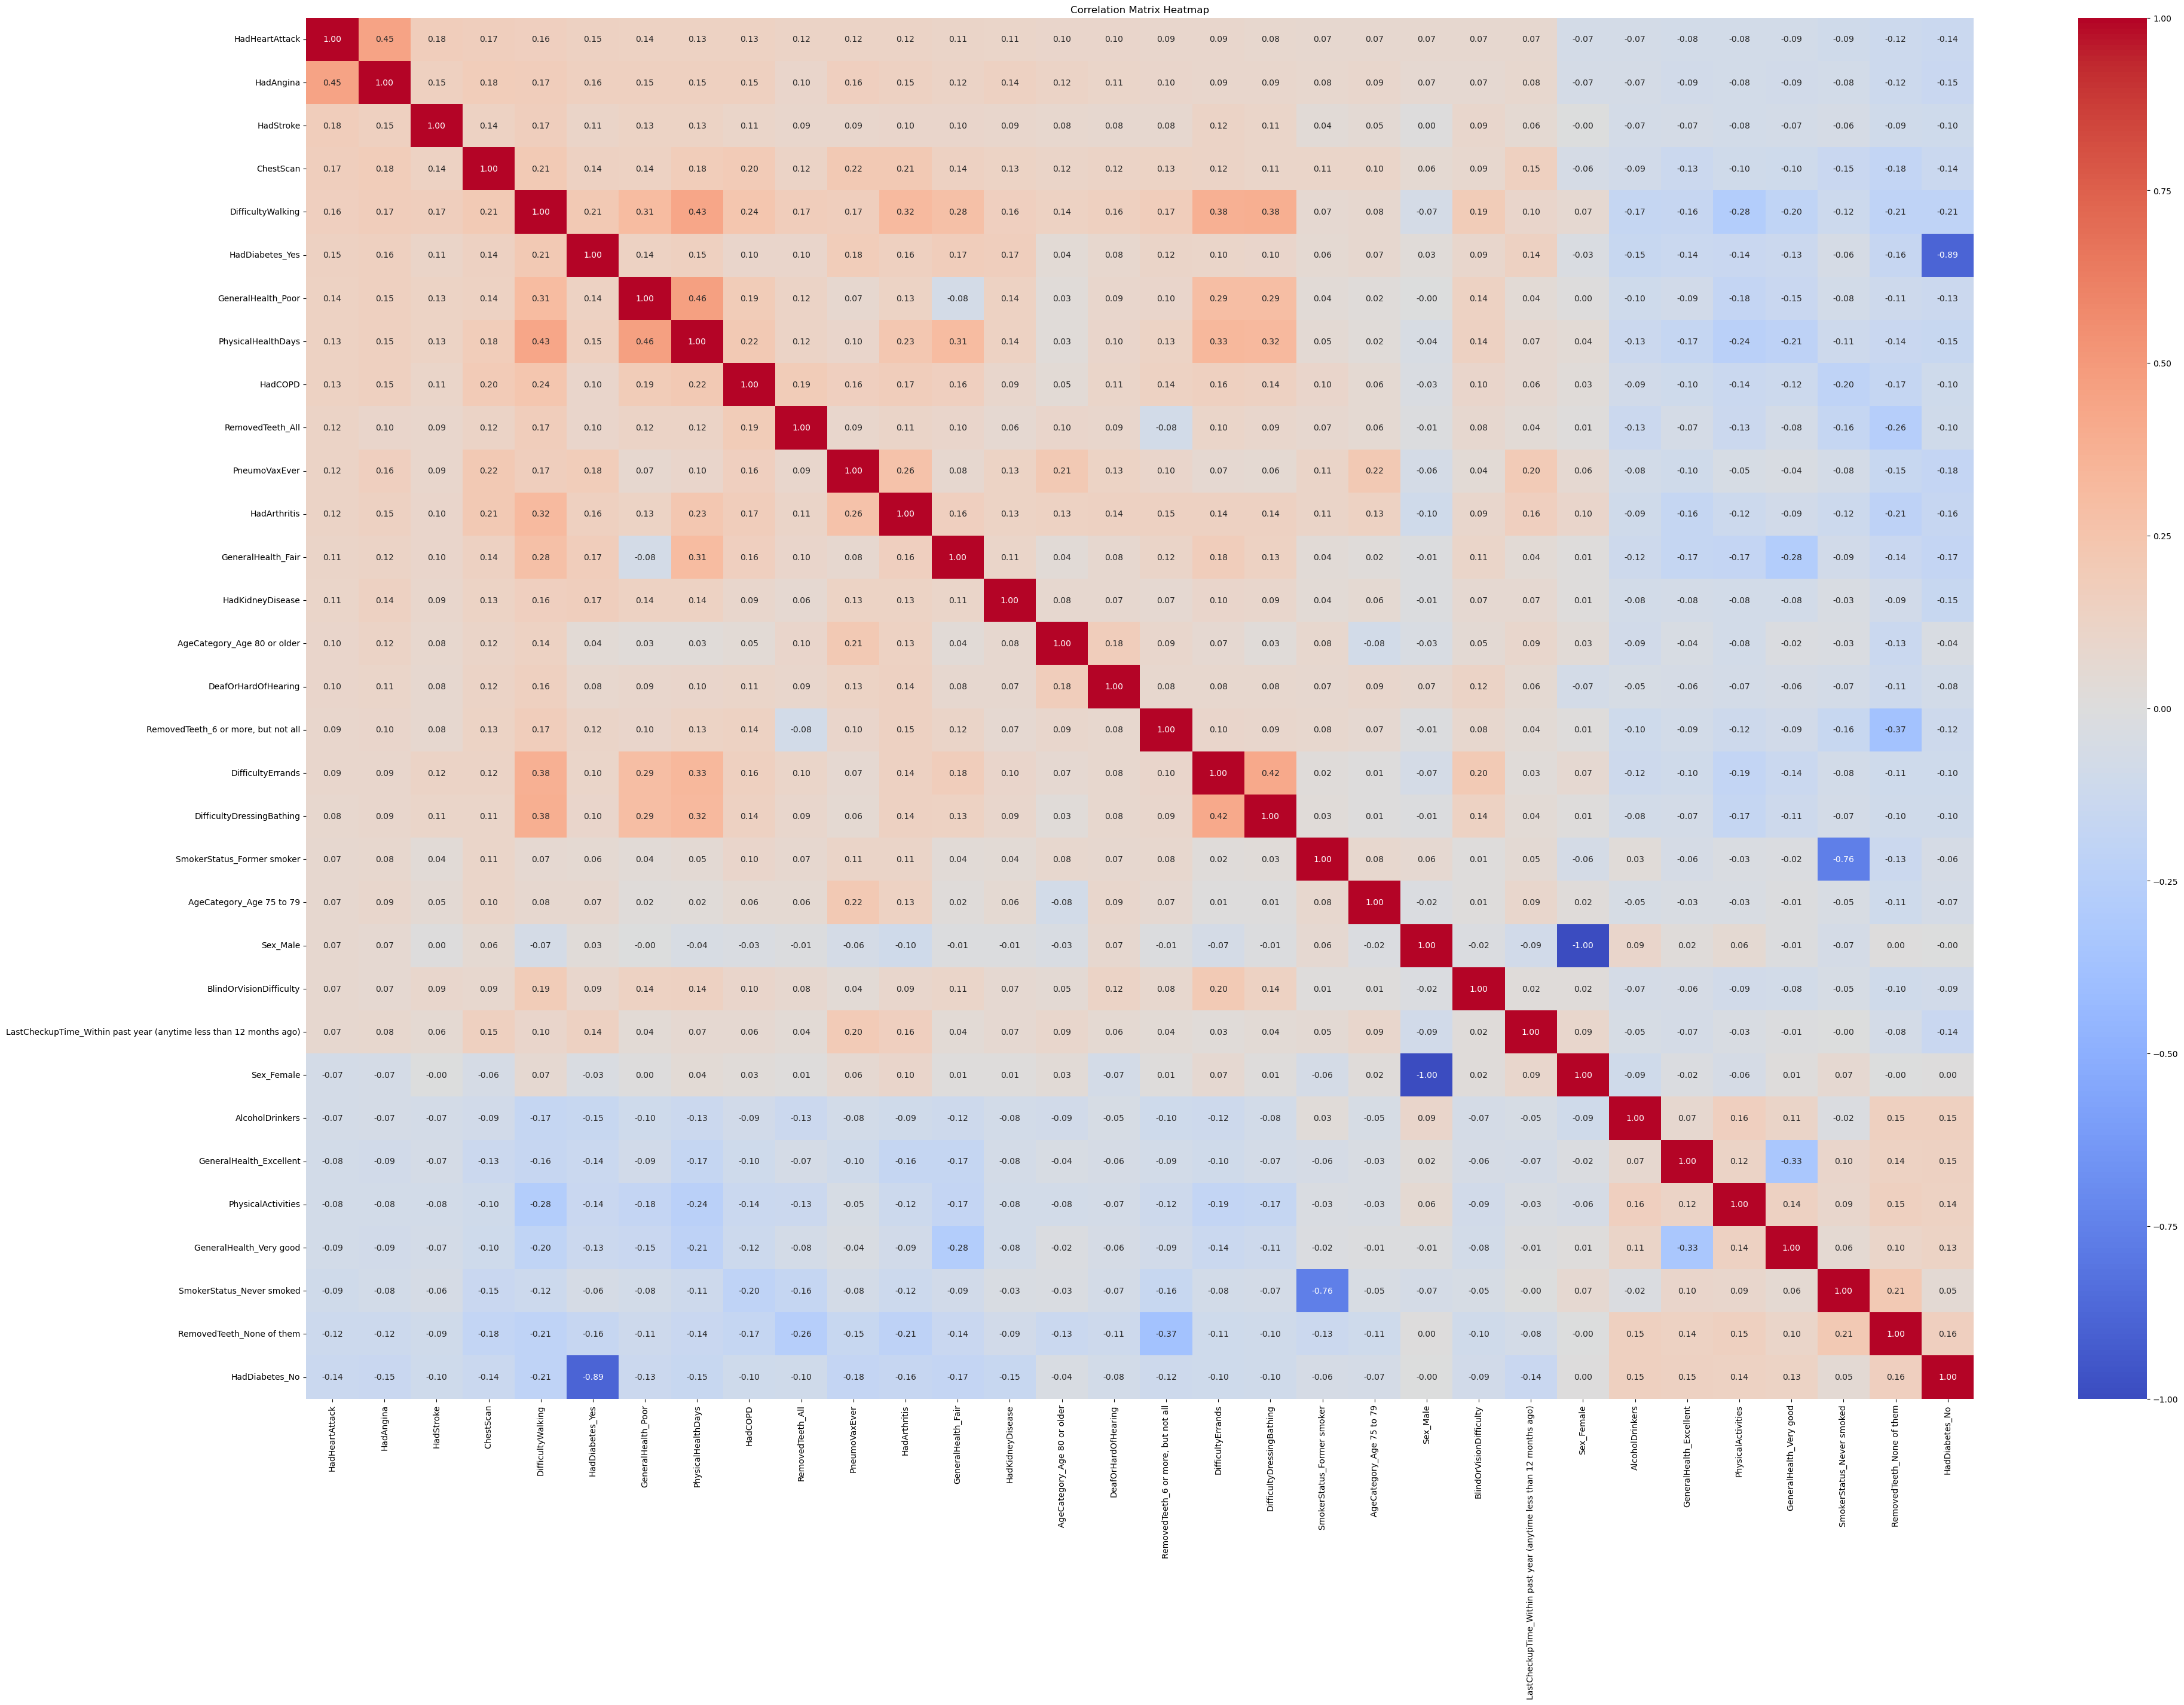

In [41]:
# Correlation matrix of only high correlaton variables and
#    dependent variables 'HadHeartAttack' using smaller data frame, 'high_corr_encoded_df'
correlation_matrix = high_corr_encoded_df[high_correlation_variable_list].corr()
# Create heatmap
plt.figure(figsize=(45, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f");
plt.title('Correlation Matrix Heatmap');
plt.show();

# NOTE: Double click on image to zoom or right click to open in new tab (better)

In [42]:
################################################
##    III.    MODEL BUILDING AND EVALUATION:
################################################

In [43]:
# LOGISTIC REGRESSION

# Isolate independent variables
independent_variables_list = [x for x in high_correlation_variable_list if x != 'HadHeartAttack']
independent_variables = high_corr_encoded_df[independent_variables_list]
# Isolate dependent variables
dependent_variable = high_corr_encoded_df['HadHeartAttack']

# Split data into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(independent_variables, dependent_variable, test_size=0.2, random_state=42)

# Initialize logistic regression model
log_reg = LogisticRegression()

# Fit logistic regression model
log_reg.fit(X_train1, y_train1)

# Create a list of tuples containing coefficients and variables
coefficients_with_variables = [(coefficient, variable) for coefficient, variable in zip(log_reg.coef_[0], independent_variables)]
# Sort the list based on the absolute value of coefficients in descending order
coefficients_with_variables.sort(key=lambda x: x[0], reverse=True)

# Evaluate and print model accuracy  
accuracy_lr1 = log_reg.score(X_test1, y_test1)
print(f"\nACCURACY:\t{accuracy_lr1:.5f}")

# Print model coefficients for each independent variable in descending order
print("\nMODEL INTERCEPT AND COEFFICIENTS IN DESCENDING ORDER:\n")

# Print model coefficients
print(f"INTERCEPT:\t{log_reg.intercept_[0]}")
print("\nCOEFFICIENT:\tVARIABLE:\n")
for coefficient, variable in coefficients_with_variables:
    print(f"{coefficient:.5f}:\t{variable}")
    

LogisticRegression()


ACCURACY:	0.94899

MODEL INTERCEPT AND COEFFICIENTS IN DESCENDING ORDER:

INTERCEPT:	-3.850075594149293

COEFFICIENT:	VARIABLE:

2.50148:	HadAngina
0.90330:	HadStroke
0.61369:	ChestScan
0.47206:	AgeCategory_Age 80 or older
0.42342:	RemovedTeeth_All
0.35085:	LastCheckupTime_Within past year (anytime less than 12 months ago)
0.33718:	GeneralHealth_Poor
0.32893:	Sex_Male
0.32789:	AgeCategory_Age 75 to 79
0.21815:	GeneralHealth_Fair
0.18364:	HadDiabetes_Yes
0.17069:	RemovedTeeth_6 or more, but not all
0.16947:	PneumoVaxEver
0.16527:	BlindOrVisionDifficulty
0.13044:	HadArthritis
0.09380:	DifficultyWalking
0.07365:	DeafOrHardOfHearing
0.06801:	HadCOPD
0.04120:	HadKidneyDisease
0.03421:	DifficultyErrands
-0.02655:	PhysicalHealthDays
-0.07039:	DifficultyDressingBathing
-0.07605:	PhysicalActivities
-0.13161:	SmokerStatus_Former smoker
-0.15674:	HadDiabetes_No
-0.19865:	AlcoholDrinkers
-0.21184:	RemovedTeeth_None of them
-0.29520:	GeneralHealth_Very good
-0.30845:	Sex_Female
-0.39795:	SmokerSta

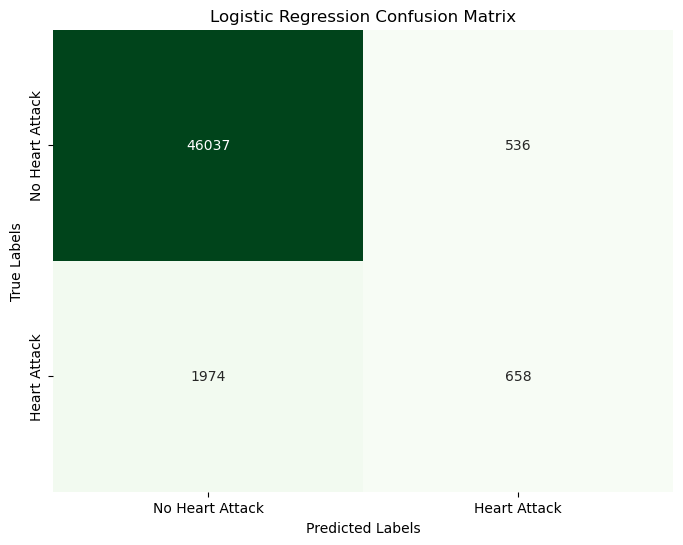

In [44]:
# Define custom labels
label_names = ['No Heart Attack', 'Heart Attack'];

# Calculate the confusion matrix
# Predict the labels for the test set
y_pred1 = log_reg.predict(X_test1)
conf_matrix1 = confusion_matrix(y_test1, y_pred1);

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6));
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Greens', cbar=False);
plt.title('Logistic Regression Confusion Matrix');
plt.xlabel('Predicted Labels');
plt.ylabel('True Labels');

# Set custom labels for ticks
plt.xticks(ticks=[0.5, 1.5], labels=label_names);
plt.yticks(ticks=[0.5, 1.5], labels=label_names);
plt.show();

In [45]:
# SUPPORT VECTOR MACHINE
# Using the same dependent_variable and independent_variables defined above

# Split data into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(independent_variables, dependent_variable, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')  # Linear kernel for binary classification

# Fit SVM classifier
svm_classifier.fit(X_train2, y_train2)

# Evaluate model performance (optional)
accuracy_svm = svm_classifier.score(X_test2, y_test2)
print(f"\nACCURACY:\t{accuracy_svm:.5f}")

SVC(kernel='linear')


ACCURACY:	0.94651


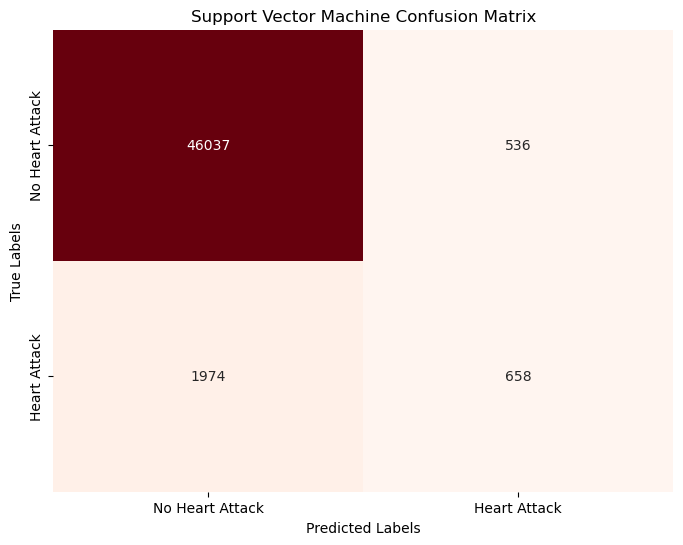

In [46]:
# Define custom labels
label_names = ['No Heart Attack', 'Heart Attack'];

# Calculate the confusion matrix
# Predict the labels for the test set
y_pred2 = log_reg.predict(X_test2)
conf_matrix2 = confusion_matrix(y_test2, y_pred2);

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6));
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Reds', cbar=False);
plt.title('Support Vector Machine Confusion Matrix');
plt.xlabel('Predicted Labels');
plt.ylabel('True Labels');

# Set custom labels for ticks
plt.xticks(ticks=[0.5, 1.5], labels=label_names);
plt.yticks(ticks=[0.5, 1.5], labels=label_names);
plt.show();

In [47]:
# COMMENT: 
#   As shown above, the accuracy of the SVM model is slightly less than the 
#   accuracy of the logistic regression (LR) model. The LR model took about 10 seconds
#   to run. The SVM model took about 4 minutes to run. These ratios between runtime 
#   and accuracy suggest that the LR model is the better choice. As a result, for 
#   this simple classification problem, only the LR model will be used going forward.

In [48]:
################################################
##    IV.    ITERATIVE PROCESS:
################################################
# A possible interaction term will be considered to capture the interaction between
#   diabetes (DM) and kidney disease (CKD),
#   ('HadDiabetes_Yes' * 'HadKidneyDisease') = 'Had_DM_+_CKD'.
#   This is meant to capture diabetic nephropathy or diabetic kidney disease which is associated
#      with increased risk of cardiovascular disease:
#   https://en.wikipedia.org/wiki/Diabetic_nephropathy
#   https://www.sciencedirect.com/science/article/pii/S1548559514000512
#   https://www.sciencedirect.com/science/article/abs/pii/S027092951830024X
#

In [49]:
# Display new data smaller frame with its dimensions
print("\n\nSMALLER DATA FRAME CONSISTING OF ONLY HIGH CORRELATION VARIABLES\n")
print("Number of rows:", high_corr_encoded_df.shape[0])
print("Number of columns:", high_corr_encoded_df.shape[1])
high_corr_encoded_df.head()
high_corr_encoded_df.tail()



SMALLER DATA FRAME CONSISTING OF ONLY HIGH CORRELATION VARIABLES

Number of rows: 246022
Number of columns: 32


,HadHeartAttack,HadAngina,HadStroke,ChestScan,DifficultyWalking,HadDiabetes_Yes,GeneralHealth_Poor,PhysicalHealthDays,HadCOPD,RemovedTeeth_All,...,BlindOrVisionDifficulty,LastCheckupTime_Within past year (anytime less than 12 months ago),Sex_Female,AlcoholDrinkers,GeneralHealth_Excellent,PhysicalActivities,GeneralHealth_Very good,SmokerStatus_Never smoked,RemovedTeeth_None of them,HadDiabetes_No
342,0,0,0,0,0,False,False,0.133333,0,False,...,0,True,True,0,False,1,True,False,True,True
343,0,0,0,0,0,True,False,0.000000,0,False,...,0,True,False,0,False,1,True,False,True,False
345,0,0,0,1,1,False,False,0.000000,0,False,...,1,True,False,1,False,0,True,False,False,True
346,0,0,0,0,1,False,False,0.166667,0,False,...,0,True,True,0,False,1,False,True,True,True
347,0,0,0,0,0,False,False,0.100000,0,False,...,0,True,True,0,False,1,False,True,False,True


,HadHeartAttack,HadAngina,HadStroke,ChestScan,DifficultyWalking,HadDiabetes_Yes,GeneralHealth_Poor,PhysicalHealthDays,HadCOPD,RemovedTeeth_All,...,BlindOrVisionDifficulty,LastCheckupTime_Within past year (anytime less than 12 months ago),Sex_Female,AlcoholDrinkers,GeneralHealth_Excellent,PhysicalActivities,GeneralHealth_Very good,SmokerStatus_Never smoked,RemovedTeeth_None of them,HadDiabetes_No
445117,0,0,0,0,0,False,False,0.000000,0,False,...,0,False,False,1,False,1,True,True,True,True
445123,0,0,0,0,0,False,False,0.000000,0,False,...,0,True,True,0,False,1,False,True,True,True
445124,0,0,1,0,0,True,False,0.000000,0,False,...,0,True,False,1,False,1,False,True,False,False
445128,0,0,0,0,0,False,False,0.066667,0,False,...,0,True,True,0,True,1,False,True,True,True
445130,1,0,0,1,0,False,False,0.000000,0,False,...,0,True,False,0,False,0,True,True,True,True


In [50]:
# Construction of the interaction term, 'Had_DM_CKD'.
# Insert column 'Had_DM_CKD' at head of high_corr_encoded_df dataframe
high_corr_encoded_df.insert(0, 'Had_DM_+_CKD', value=np.nan)
# Define the new column,Had_DM_CKD,as the product of columns 'HadDiabetes' and 'HadKidneyDisease'
high_corr_encoded_df['Had_DM_+_CKD'] = high_corr_encoded_df['HadDiabetes_Yes'] * high_corr_encoded_df['HadKidneyDisease']

In [51]:
# Reorder the columns to allow for easier viewing of relevant column/variables
reordered_columns = ['HadHeartAttack'] + ['Had_DM_+_CKD'] + ['HadDiabetes_Yes'] + ['HadKidneyDisease'] + \
[col for col in high_corr_encoded_df.columns if col != 'HadHeartAttack' and col != 'Had_DM_+_CKD' \
 and col != 'HadDiabetes_Yes' and col != 'HadKidneyDisease']
high_corr_encoded_df = high_corr_encoded_df[reordered_columns]



# Display new data smaller frame with its dimensions
print("\n\nSMALLER DATA FRAME CONSISTING OF ONLY HIGH CORRELATION VARIABLES\n")
print("Number of rows:", high_corr_encoded_df.shape[0])
print("Number of columns:", high_corr_encoded_df.shape[1])
high_corr_encoded_df.head()
high_corr_encoded_df.tail()



SMALLER DATA FRAME CONSISTING OF ONLY HIGH CORRELATION VARIABLES

Number of rows: 246022
Number of columns: 33


,HadHeartAttack,Had_DM_+_CKD,HadDiabetes_Yes,HadKidneyDisease,HadAngina,HadStroke,ChestScan,DifficultyWalking,GeneralHealth_Poor,PhysicalHealthDays,...,BlindOrVisionDifficulty,LastCheckupTime_Within past year (anytime less than 12 months ago),Sex_Female,AlcoholDrinkers,GeneralHealth_Excellent,PhysicalActivities,GeneralHealth_Very good,SmokerStatus_Never smoked,RemovedTeeth_None of them,HadDiabetes_No
342,0,0,False,0,0,0,0,0,False,0.133333,...,0,True,True,0,False,1,True,False,True,True
343,0,0,True,0,0,0,0,0,False,0.000000,...,0,True,False,0,False,1,True,False,True,False
345,0,0,False,0,0,0,1,1,False,0.000000,...,1,True,False,1,False,0,True,False,False,True
346,0,0,False,0,0,0,0,1,False,0.166667,...,0,True,True,0,False,1,False,True,True,True
347,0,0,False,0,0,0,0,0,False,0.100000,...,0,True,True,0,False,1,False,True,False,True


,HadHeartAttack,Had_DM_+_CKD,HadDiabetes_Yes,HadKidneyDisease,HadAngina,HadStroke,ChestScan,DifficultyWalking,GeneralHealth_Poor,PhysicalHealthDays,...,BlindOrVisionDifficulty,LastCheckupTime_Within past year (anytime less than 12 months ago),Sex_Female,AlcoholDrinkers,GeneralHealth_Excellent,PhysicalActivities,GeneralHealth_Very good,SmokerStatus_Never smoked,RemovedTeeth_None of them,HadDiabetes_No
445117,0,0,False,0,0,0,0,0,False,0.000000,...,0,False,False,1,False,1,True,True,True,True
445123,0,0,False,0,0,0,0,0,False,0.000000,...,0,True,True,0,False,1,False,True,True,True
445124,0,0,True,0,0,1,0,0,False,0.000000,...,0,True,False,1,False,1,False,True,False,False
445128,0,0,False,0,0,0,0,0,False,0.066667,...,0,True,True,0,True,1,False,True,True,True
445130,1,0,False,0,0,0,1,0,False,0.000000,...,0,True,False,0,False,0,True,True,True,True


In [52]:
# RE-Verify that all variables (including 'Had_DM_+_CKD') are now some form of numeric:
#  -- integer, binary 0 or 1
#  -- float (normalized/scaled between 0 and 1)
#  -- boolean, True "1"/False "0" (after one-hot encoding)
# Print unique catagories for each column/variable
for column in high_corr_encoded_df.columns:
    unique_categories = high_corr_encoded_df[column].unique()
    print(f"Unique categories for column '{column}':")
    print(unique_categories)
    print()

Unique categories for column 'HadHeartAttack':
[0 1]

Unique categories for column 'Had_DM_+_CKD':
[0 1]

Unique categories for column 'HadDiabetes_Yes':
[False  True]

Unique categories for column 'HadKidneyDisease':
[0 1]

Unique categories for column 'HadAngina':
[0 1]

Unique categories for column 'HadStroke':
[0 1]

Unique categories for column 'ChestScan':
[0 1]

Unique categories for column 'DifficultyWalking':
[0 1]

Unique categories for column 'GeneralHealth_Poor':
[False  True]

Unique categories for column 'PhysicalHealthDays':
[0.13333333 0.         0.16666667 0.1        0.06666667 0.83333333
 1.         0.5        0.96666667 0.26666667 0.53333333 0.66666667
 0.33333333 0.3        0.23333333 0.03333333 0.7        0.2
 0.9        0.46666667 0.4        0.36666667 0.43333333 0.93333333
 0.56666667 0.76666667 0.8        0.86666667 0.6        0.73333333
 0.63333333]

Unique categories for column 'HadCOPD':
[0 1]

Unique categories for column 'RemovedTeeth_All':
[False  True]

U

In [53]:
# Determine correlation matrix
# Set pandas display options to show all columns
pd.set_option('display.max_rows', None)

# Calculate correlation between the selected variable and all other variables
correlation_with_HadHeartAttack_variable = high_corr_encoded_df.corr()['HadHeartAttack'].sort_values(ascending=False)

# Print all correlation values
print("Correlation with selected variable:")
print(correlation_with_HadHeartAttack_variable)

Correlation with selected variable:
HadHeartAttack                                                        1.000000
HadAngina                                                             0.445903
HadStroke                                                             0.177137
ChestScan                                                             0.167760
DifficultyWalking                                                     0.159878
HadDiabetes_Yes                                                       0.145868
GeneralHealth_Poor                                                    0.140607
PhysicalHealthDays                                                    0.133420
HadCOPD                                                               0.133223
RemovedTeeth_All                                                      0.120564
PneumoVaxEver                                                         0.119955
HadArthritis                                                          0.117773
GeneralHealth_Fa

In [54]:
# LOGISTIC REGRESSION AGAIN

# Isolate independent variables
column_names_with_interaction_list = high_corr_encoded_df.columns.tolist()
independent_variables_list = [x for x in column_names_with_interaction_list if x != 'HadHeartAttack']
independent_variables = high_corr_encoded_df[independent_variables_list]
# Isolate dependent variables
dependent_variable = high_corr_encoded_df['HadHeartAttack']

# Split data into train and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(independent_variables, dependent_variable, test_size=0.2, random_state=42)

# Initialize logistic regression model
log_reg = LogisticRegression()

# Fit logistic regression model
log_reg.fit(X_train3, y_train3)

# Create a list of tuples containing coefficients and variables
coefficients_with_variables = [(coefficient, variable) for coefficient, variable in zip(log_reg.coef_[0], independent_variables)]
# Sort the list based on the absolute value of coefficients in descending order
coefficients_with_variables.sort(key=lambda x: x[0], reverse=True)

# Evaluate and print model accuracy  
accuracy_lr_3 = log_reg.score(X_test3, y_test3)
print(f"\nACCURACY:\t{accuracy_lr_3:.5f}")

# Print model coefficients for each independent variable in descending order
print("\nMODEL INTERCEPT AND COEFFICIENTS IN DESCENDING ORDER:\n")

# Print model coefficients
print(f"INTERCEPT:\t{log_reg.intercept_[0]}")
print("\nCOEFFICIENT:\tVARIABLE:\n")
for coefficient, variable in coefficients_with_variables:
    print(f"{coefficient:.5f}:\t{variable}")

LogisticRegression()


ACCURACY:	0.94899

MODEL INTERCEPT AND COEFFICIENTS IN DESCENDING ORDER:

INTERCEPT:	-3.8379177682053203

COEFFICIENT:	VARIABLE:

2.50163:	HadAngina
0.90367:	HadStroke
0.61366:	ChestScan
0.47199:	AgeCategory_Age 80 or older
0.42350:	RemovedTeeth_All
0.35063:	LastCheckupTime_Within past year (anytime less than 12 months ago)
0.33744:	GeneralHealth_Poor
0.32790:	AgeCategory_Age 75 to 79
0.31744:	Sex_Male
0.21822:	GeneralHealth_Fair
0.18307:	HadDiabetes_Yes
0.17065:	RemovedTeeth_6 or more, but not all
0.16948:	PneumoVaxEver
0.16498:	BlindOrVisionDifficulty
0.13041:	HadArthritis
0.09381:	DifficultyWalking
0.07362:	DeafOrHardOfHearing
0.06793:	HadCOPD
0.04023:	HadKidneyDisease
0.03432:	DifficultyErrands
0.00121:	Had_DM_+_CKD
-0.02692:	PhysicalHealthDays
-0.07036:	DifficultyDressingBathing
-0.07598:	PhysicalActivities
-0.13149:	SmokerStatus_Former smoker
-0.15720:	HadDiabetes_No
-0.19864:	AlcoholDrinkers
-0.21189:	RemovedTeeth_None of them
-0.29525:	GeneralHealth_Very good
-0.31989:	Sex_Fem

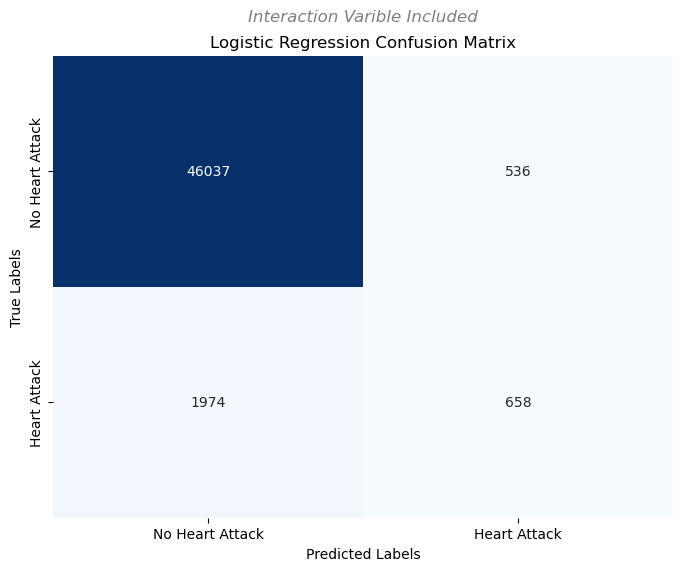

In [55]:
# Define custom labels
label_names = ['No Heart Attack', 'Heart Attack'];

# Calculate the confusion matrix
# Predict the labels for the test set
y_pred3 = log_reg.predict(X_test3)
conf_matrix3 = confusion_matrix(y_test3, y_pred3);

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6));
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False);
plt.title('Logistic Regression Confusion Matrix');
plt.text(1, -0.15, 'Interaction Varible Included', horizontalalignment='center', \
         fontsize=12, fontstyle='italic', color='gray');
plt.xlabel('Predicted Labels');
plt.ylabel('True Labels');

# Set custom labels for ticks
plt.xticks(ticks=[0.5, 1.5], labels=label_names);
plt.yticks(ticks=[0.5, 1.5], labels=label_names);
plt.show();

In [56]:
##########################################################
##    V.    CONCLUSION:
##########################################################
# Based on the the results of the above logisic regression,
# the top 7 variables or factors most associated with having a heart attack are:
#   1.) HadAngina
#   2.) HadStroke
#   3.) ChestScan
#   4.) AgeCategory_Age 80 or older
#   5.) RemovedTeeth_All
#   6.) LastCheckupTime_Within past year (anytime less than 12 months ago)
#   7.) GeneralHealth_Poor

# Surprisingly, the variables HadDiabetes_Yes, HadCOPD, HadKidneyDisease, and 
# the interaction term, Had_DM_+_CKD, hoping to capture diabetic kidney disease,
# were not present in the top 7 risk factors. 

# Based on the the results of the above logisic regression,
# the top 7 variables or factors most protective against with having a heart attack are:
#   1.) GeneralHealth_Excellent
#   2.) SmokerStatus_Never smoked
#   3.) Sex_Female
#   4.) GeneralHealth_Very good
#   5.) RemovedTeeth_None of them
#   6.) AlcoholDrinkers
#   7.) HadDiabetes_No

# Surprising among top 7 protective factors is AlcoholDrinkers.
# This most likely indicates light, moderate or social drinking, rather than heavy drinking**.
# However, this distinction is not clear in the data available**.
# Also surprising is the factor of diabetes. When absent it is protective fector,
# HadDiabetes_No, but when present it is a risk factor, but not a top 7 risk factor.

# Public Health Policy Recommendations:
#   1.) Maintain excellent health through diet and exercise.
#   2.) Don't smoke - ever.
#   3.) Practice good daily oral hygiene and see your dentist regularly.
#   4.) Drink alcohol sparingly (?**).
#   5.) Screen routinely for diabetes and prevent it, if possible, through recommendation 1.).